Import

In [21]:
# Imported library
import os
import numpy as np
import logging
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices
import cv2

Dataset

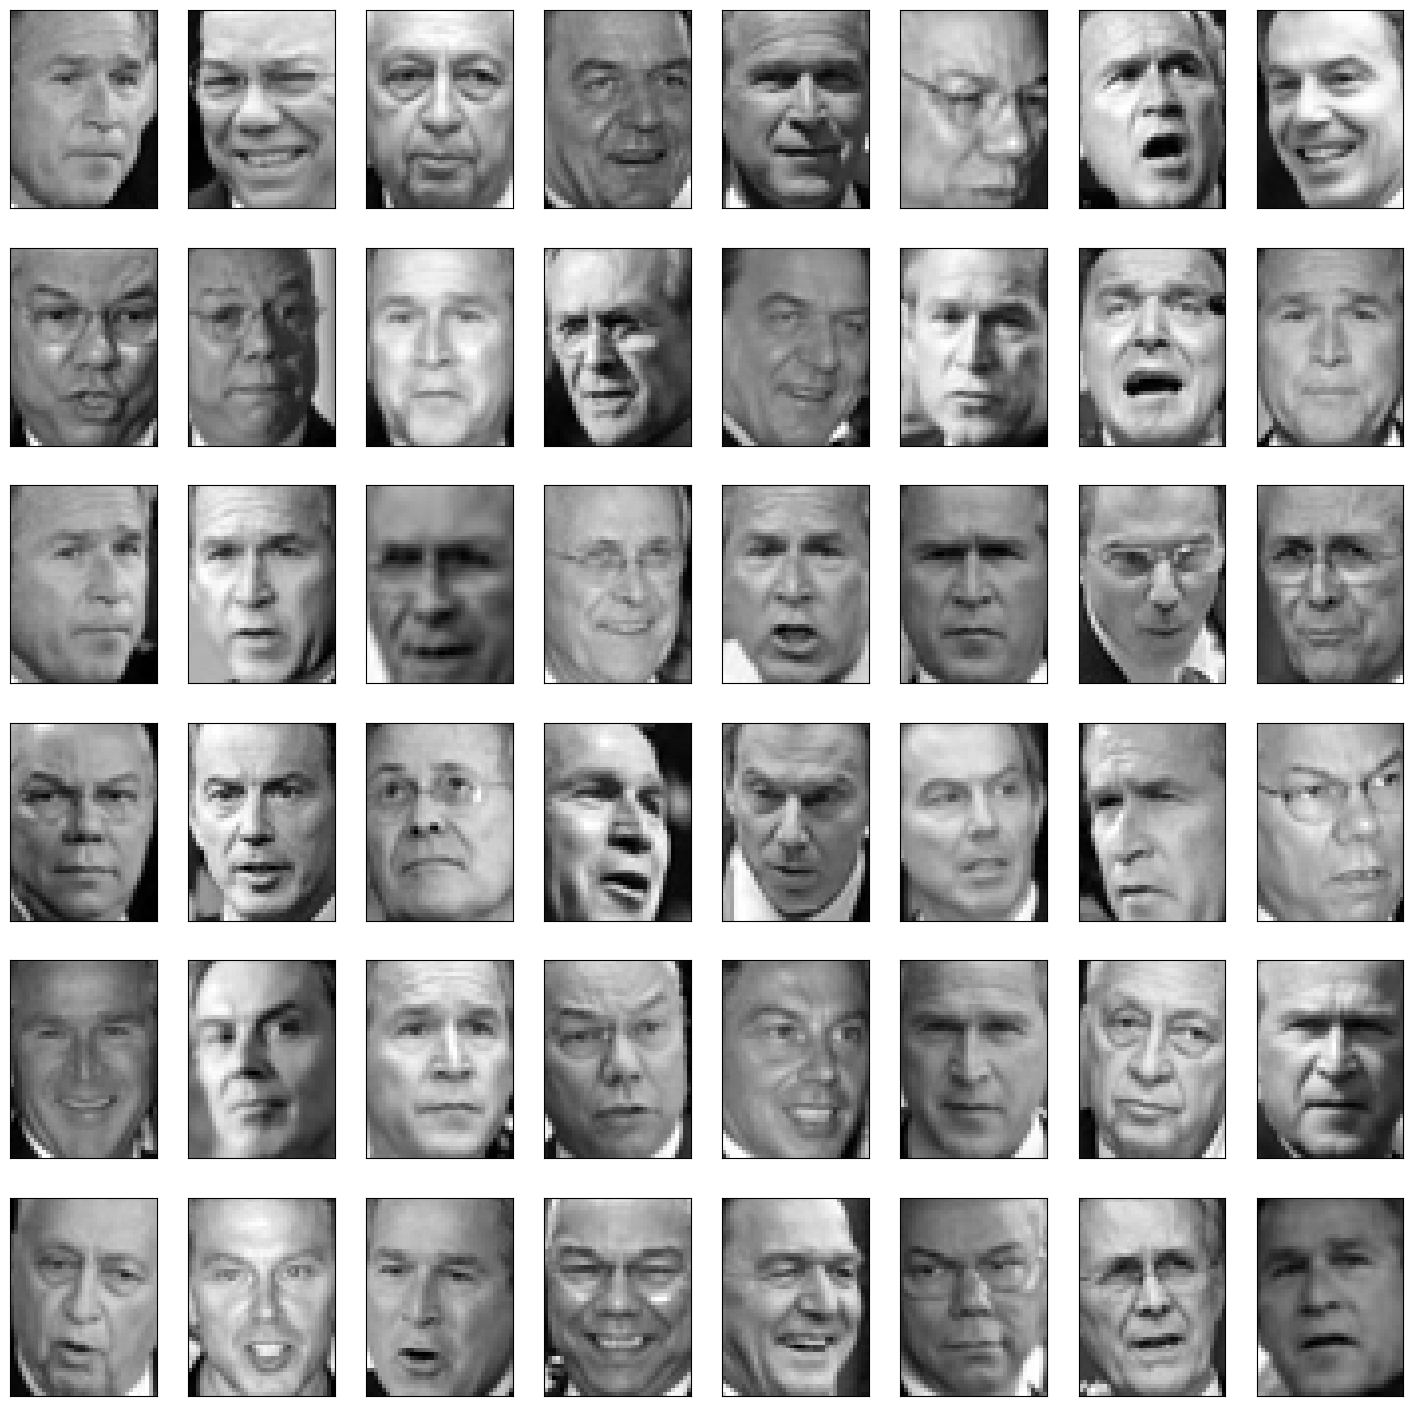

In [22]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X=lfw_people.data/256
y=lfw_people.target
n_samples, h, w = lfw_people.images.shape
X=X.T

# Plot display
plt.rcParams["figure.figsize"] = (18,18)
plt.gray()
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(X[:,i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show()

AE

torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([1, 1, 50, 37])
Epoch [1/10], Loss: 0.0298
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50, 37])
torch.Size([64, 1, 50,

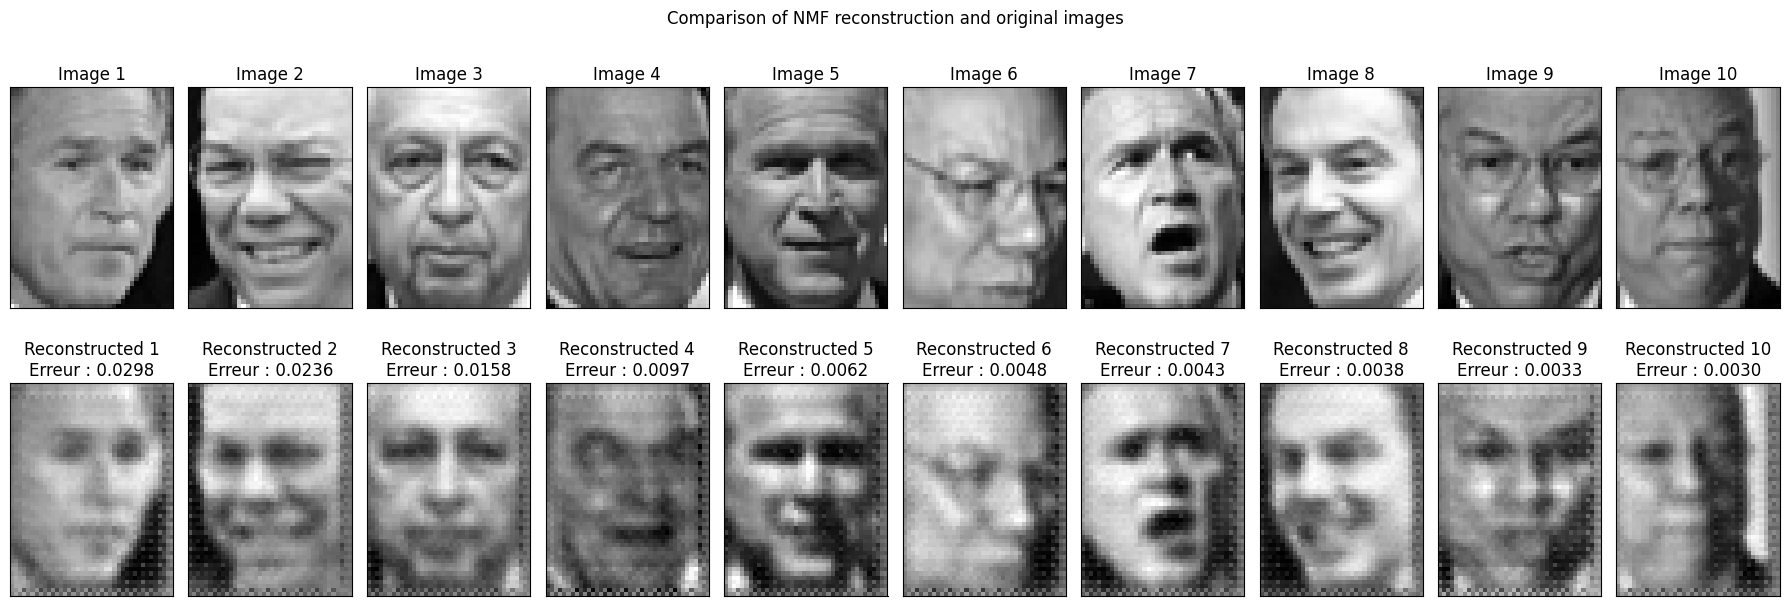

In [34]:
# Imported library
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Reshape for convolutional layers
X = lfw_people.images.reshape((-1, 1, h, w))

# Data preparation
X_tensor = torch.tensor(X, dtype=torch.float32)               # PyTorch tensor
dataset = TensorDataset(X_tensor)                             # PyTorch dataset
dataloader = DataLoader(dataset, batch_size=64, shuffle=True) # PyTorch dataloader

# Encoder
encoder = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
    nn.ReLU()
)

# Decoder
decoder = nn.Sequential(
    nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
    nn.ReLU(),
    nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
    nn.Sigmoid()
)

# Initialization of variables
num_epochs = 10                                                                           # Number of epochs
losses = []                                                                               # Loss values
criterion = nn.MSELoss()                                                                  # Mean Squared Error loss function
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001) # Adam optimizer with learning rate 0.001

# For each epochs
for epoch in range(num_epochs):
    # Initialization of variable
    epoch_loss = 0 # Loss per epoch

    # For each images
    for data in dataloader:
        # Initialization of variables
        inputs, = data        # Data
        optimizer.zero_grad() # Gradients

        # Encoding
        encoded = encoder(inputs)

        # Decoding
        decoded = decoder(encoded)[:, :, :h, :w]

        # Loss calculation
        loss = criterion(decoded, inputs)
        loss.backward()          

        # Weights update
        optimizer.step()

        # Sum of loss
        epoch_loss += loss.item()

    # Loss per epoch
    epoch_loss /= len(dataloader)
    losses.append(epoch_loss)

    # Message display
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Results
with torch.no_grad():
    encoded_X = encoder(X_tensor)  # Encoded data
    decoded_X = decoder(encoded_X) # Decoded data

# Plot display
plt.figure(figsize=(18, 18))
for i in range(num_epochs):
    # Original images
    plt.subplot(6, 10, i + 1)
    plt.imshow(X[i, 0], cmap=plt.cm.gray)
    plt.title(f"Image {i+1}")
    plt.xticks(())
    plt.yticks(())
    
    # Reconstructed images
    plt.subplot(6, 10, num_epochs + i + 1)
    plt.imshow(decoded_X[i, 0], cmap=plt.cm.gray)
    plt.title(f"Reconstructed {i+1}\nErreur : {losses[i]:.4f}")
    plt.xticks(())
    plt.yticks(())
plt.suptitle(f"Comparison of NMF reconstruction and original images", y=1)
plt.tight_layout()
plt.show()